In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# TP 4: Análisis Armónico

## Teoría de Equilibrio
De la Teoría de Equilibrio, se obtuvo que la variación de la superficie del mar bajo la acción de la fuerza generadora de marea puede escribirse cómo:

$$\eta(t) = \sum f_i H_{Ti} \cos(V+u)_i $$

En dónde $f_i$ es el factor nodal, $H_{Ti}$ es la amplitud teórica para cada componente y $(V+u)_i$ es el argumento de equilibrio de cada componente.

Repasemos un poco cada uno de estos términos:


### Amplitud

Esta amplitud, según la Teoría de Equilibrio y sus supuestos, depende de la componente vertical de la fuerza de marea, del radio terrestre, de la latitud y de U (U=$\frac{M_L}{M_T}(\frac{a}{c_L})^3$, con $a$ radio terrestre, $M$ masas de la tierra y del astro y $c$ distancia promedio entre tierra-astro)

### Factor Nodal

Depende de la oblicuidad de la órbita de la luna y permite ajustar la importancia relativa de cada componente a un instante determinado.

### Argumento de Equilibrio

El argumento de equilibrio de cada componente es una combinación lineal de los parámetros astronómicos medios $s$, $T$, $p$, $h$, $N$, $\xi$ y $\nu$.
Estos parámetros varían uniformemente en el tiempo y sus velocidades son:

$\frac{ds}{dt} = 0.54901 °/h$

$\frac{dp}{dt}=0.00464183 °/h$

$\frac{dh}{dt}=0.0406864 °/h$

$\frac{dT}{dt}=15 °/h$

$\frac{dN}{dt}=-0.00220641 °/h$



Supongamos por ejemplo que nos paramos en Monte Hermoso.

Entonces, si bien las amplitudes y las fases no son las esperadas, sabemos que las frecuencias están bien descritas por estos armónicos.

Por lo tanto, se toma el enfoque de corregir o adaptar la amplitud y las fases de estos armónicos a la región de interés.

$$\eta(t) = \sum \color{blue}{f_i} \color{red}{H_{i}} \cos(\color{blue}{(V+u)_i} - \color{red}{K'_i}) $$

En dónde se marcó los parámetros que dependientes del tiempo (azul) y del sitio (rojo).

*Importante: los términos en azul están definidos en función del tiempo (en las escalas que nos interesan). Entonces, si conocemos la corrección para un sitio, podemos saber cuál será la elevación de la superficie generada por la fueza de marea.* **Es decir, conozco la marea para cualquier momento pasado o futuro, de aquí que se lo llame un fenómeno determinístico**

## Componentes armónicas de marea: Monte Hermoso

En el archivo se tienen valores de amplitud ($H(m)$) y fase ($K'(°)$) de las componentes armónicas más importantes del sitio.

In [ ]:
#@title Carga del archivo { form-width: "10%" }
#t1=np.arange(0,24*415.98,0.0833)
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/HKmh.xlsx
HKmh=pd.read_excel(r'HKmh.xlsx')
HKmh.rename(columns={HKmh.columns[0]:'nom',HKmh.columns[1]:'H',HKmh.columns[2]:'sigma',HKmh.columns[3]:'K'},inplace=True)


--2022-11-08 22:45:46--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/HKmh.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9161 (8.9K) [application/octet-stream]
Saving to: ‘HKmh.xlsx’

HKmh.xlsx           100%[===================>]   8.95K  --.-KB/s    in 0s      

2022-11-08 22:45:47 (101 MB/s) - ‘HKmh.xlsx’ saved [9161/9161]



In [ ]:
HKmh

,nom,H,sigma,K
0,S0,1.8900,0.000000,0.0
1,M2,1.1598,28.984104,160.3
2,S2,0.1966,30.000000,292.4
3,N2,0.2249,28.439729,89.5
4,K2,0.0536,30.082137,292.1
5,K1,0.1920,15.041069,30.1
6,O1,0.1570,13.943036,343.8
7,P1,0.0640,14.958931,30.4


Notemos:

*   Aparece una "componente" llamada $S_0$ que tiene fase 0 y frecuencia angular 0. Esto no es más que el nivel medio en formato de "onda" para agregarlo a la sumatoria.
*   Las frecuencias de las ondas son las derivadas de la Teoría de Equilibrio
* La relación entre la amplitud de la M2 y la S2 no es la que esperaríamos en función de la TdE.
* El orden de importancia de las componentes no es el esperado.



## Cambios respecto a la Teoría de Equilibrio

Veamos los cambios respecto a la marea resultante de utilizar las componentes tal cual las vimos en la práctica anterior.

En principio consideremos solamente los cambios en amplitud de las componentes.

In [ ]:
#Defino un eje temporal en horas (en este caso un mes cada 15 minutos)
t=np.arange(0,30*24,0.25)
#Escribo las componentes de marea usando las amplitudes para Monte Hermoso
M2mh=HKmh.H.iloc[1]*np.cos(np.deg2rad(HKmh.sigma.iloc[1]*t))
S2mh=HKmh.H.iloc[2]*np.cos(np.deg2rad(HKmh.sigma.iloc[2]*t))
N2mh=HKmh.H.iloc[3]*np.cos(np.deg2rad(HKmh.sigma.iloc[3]*t))
#Escribo las componentes de marea usando las amplitudes de la TdE
M2=1*np.cos(np.deg2rad(HKmh.sigma.iloc[1]*t))
S2=0.46*np.cos(np.deg2rad(HKmh.sigma.iloc[2]*t))
N2=0.1915*np.cos(np.deg2rad(HKmh.sigma.iloc[3]*t))

[Text(0.5, 1.0, 'Marea a partir de armónicos M2, S2 y N2')]

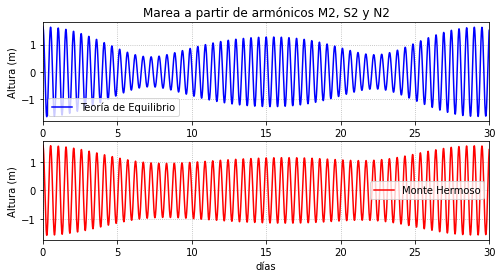

In [ ]:
#@title Figura 1
fig,axs=plt.subplots(2,1,figsize=(8,4))
axs[0].plot(t/24,M2+S2+N2,'b')
axs[1].plot(t/24,M2mh+S2mh+N2mh,'r')
for ax in axs.flat:
  ax.set(xlim=[0,30],ylabel='Altura (m)')
  ax.grid(ls=':',which='both')
axs[1].set(xlabel='días')
axs[0].legend(['Teoría de Equilibrio'])
axs[1].legend(['Monte Hermoso'])
axs[0].set(title='Marea a partir de armónicos M2, S2 y N2')

Aún puede observarse el ciclo de sicigias/cuadraturas durante el mes, pero con algún desplazamiento temporal y una marcada asimetría de amplitud.

Si además consideramos la fase de las componentes de Monte Hermoso.

In [ ]:
#Calculamos las componentes de marea con amplitud y fase de Monte Hermoso
M2mh=HKmh.H.iloc[1]*np.cos(np.deg2rad(HKmh.sigma.iloc[1]*t-HKmh.K.iloc[1]))
S2mh=HKmh.H.iloc[2]*np.cos(np.deg2rad(HKmh.sigma.iloc[2]*t-HKmh.K.iloc[2]))
N2mh=HKmh.H.iloc[3]*np.cos(np.deg2rad(HKmh.sigma.iloc[3]*t-HKmh.K.iloc[3]))

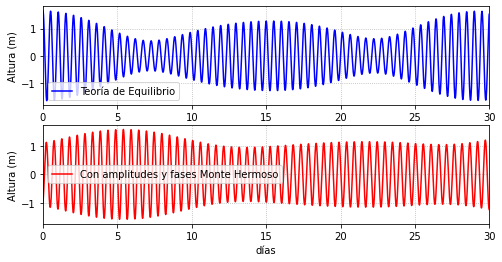

In [ ]:
#@title Figura 2
fig,axs=plt.subplots(2,1,figsize=(8,4))
axs[0].plot(t/24,M2+S2+N2,'b')
axs[1].plot(t/24,M2mh+S2mh+N2mh,'r')
for ax in axs.flat:
  ax.set(xlim=[0,30],ylabel='Altura (m)')
  ax.grid(ls=':',which='both')
axs[1].set(xlabel='días')
axs[0].legend(['Teoría de Equilibrio'])
axs[1].legend(['Con amplitudes y fases Monte Hermoso'])

## Tablas de Marea

Volviendo a la expresión de la marea.

$$\eta(t) = \sum \color{blue}{f_i} \color{red}{H_{i}} \cos(\color{blue}{(V+u)_i} - \color{red}{K'_i}) $$

Entonces, conociendo las expresiónes de los términos en azul y los valores de los términos en rojo --> marea en cualquier momento!

Si es a futuro se llama: *predicción de marea*.

En Argentina, es el Servicio de Hidrografía Naval el encargado de elaborar y publicar las Tablas de Marea para distintos sitios del litoral marítimo. En el sitio web del SHN podemos encontrar esta información, veamos por ejemplo para Monte Hermoso.

http://www.hidro.gov.ar/oceanografia/Tmareas/RE_Mareas.asp


## Predicción de Marea

De acuerdo a lo dicho, estamos en condiciones de predecir la marea en Monte Hermoso (siempre que nos den el factor nodal y el argumento de equilibrio de las componentes 😉).

En los archivos *f_mh_2022.csv* y *vu_mh.csv* están los valores de los factores nodales y argumentos de equilibrio para las componentes M2, S2, N2, K2, K1, O1 y P1. Fueron calculados para el periodo del '2022-10-21 00:00:00 UTC' hasya '2022-10-22 03:00:00 UTC' cada 5 minutos.


In [ ]:
#@title Carga de factor nodal y argumento de equilibrio
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_mh_2022.csv
f=pd.read_csv(r'f_mh_2022.csv',index_col=0)
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_mh_2022.csv
vu=pd.read_csv(r'vu_mh_2022.csv',index_col=0)

--2022-11-08 22:45:48--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_mh_2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40019 (39K) [text/plain]
Saving to: ‘f_mh_2022.csv’

f_mh_2022.csv       100%[===================>]  39.08K  --.-KB/s    in 0.003s  

2022-11-08 22:45:48 (11.5 MB/s) - ‘f_mh_2022.csv’ saved [40019/40019]

--2022-11-08 22:45:48--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_mh_2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49167 (48K) [text/plain]
Saving to: ‘vu_

In [ ]:
# Prediccion de marea para Monte Hermoso
Q=len(HKmh)-1 #Le resto 1 porque tiene el nivel medio
ondas=pd.DataFrame()
for i in range(Q):
  ondas.insert(i,i,(HKmh.H.iloc[i+1])*f.iloc[:,i].values*np.cos(vu.iloc[:,i].values-np.deg2rad(HKmh.K.iloc[i+1])))
suma=ondas.sum(axis=1).values
prediccion=pd.DataFrame(np.around(suma,4),pd.to_datetime(f.index),['pred'])
#--> notar que cuando cargué los factores nodales la fecha se cargó como un "objeto" y no como "datetimeindex"

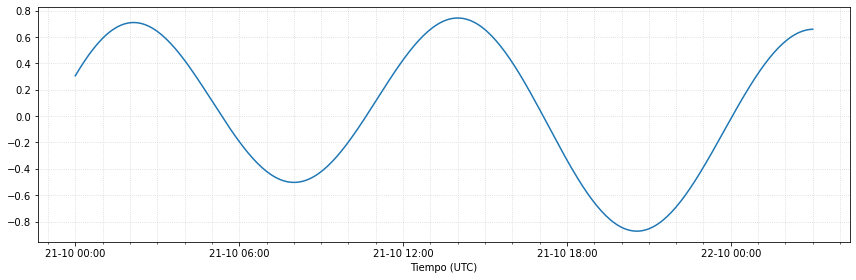

In [ ]:
#@title Figura: Predicción hoy Monte Hermoso
import matplotlib.dates as mdates
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(prediccion.index,prediccion.pred)
axs.xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axs.xaxis.set_minor_locator(mdates.HourLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs.grid(color='lightgrey',linestyle=':',which='both')
axs.set(xlabel='Tiempo (UTC)')
plt.tight_layout()

In [ ]:
#Del sitio del SHN
fech_SHN=['2022-10-21 02:08:00','2022-10-21 08:00:00','2022-10-21 14:00:00','2022-10-21 20:34:00']
pyb_SHN=np.array([2.65,1.44,2.68,1.07])-1.94

In [ ]:
tabla=pd.DataFrame(data=pyb_SHN,index=pd.to_datetime(fech_SHN),columns=['pred'])

In [ ]:
tabla

,pred
2022-10-21 02:08:00,0.71
2022-10-21 08:00:00,-0.50
2022-10-21 14:00:00,0.74
2022-10-21 20:34:00,-0.87


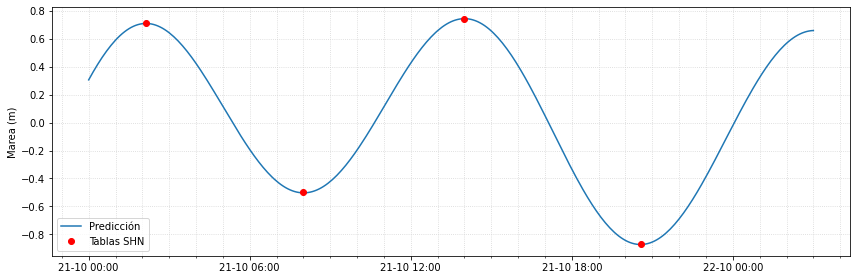

In [ ]:
#@title Figura: Predicción MH y Tabla MH
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(prediccion.pred)
axs.plot(tabla,'ro')
axs.set(ylabel='Marea (m)')
axs.xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axs.xaxis.set_minor_locator(mdates.HourLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs.grid(color='lightgrey',linestyle=':',which='both')
axs.legend(['Predicción','Tablas SHN'])
plt.tight_layout()

Entonces, para poder determinar la marea en un sitio en particular se necesita, además de los parámetros atronómicos de la TdE (factores nodales y argumentos de equilibrio), constantes armónicas de marea (amplitudes y fases).

$$\eta(t) = \sum \color{blue}{f_i} \color{red}{H_{i}} \cos(\color{blue}{(V+u)_i} - \color{red}{K'_i}) $$

**¿De dónde salen esas constantes?**

DEL ANÁLISIS ARMÓNICO DE OBSERVACIONES DEL NIVEL DEL MAR.







## Análisis Armónico

Si consideramos que el nivel del mar observado puede ser expresado como:

$$h(t)=S_0+\sum_{i=1}^{Q} R_i \cos(\sigma_it-\alpha_i)$$

Con $S_0$ es el nivel medio del mar (considerado constante).
$R_i$, $\sigma_i$ y $\alpha_i$ son la amplitud, a frecuencia angular (de la TdE) y la fase de cada armónico.



Entonces, para hacer el Análisis Armónico de acuerdo a como está planteado, se requiere una serie de observaciones del nivel del mar y las frecuencias angulares de las componentes armónicas derivadas de la TdE.

In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/MH_julio2002.csv
serie=pd.read_csv(r'MH_julio2002.csv',index_col=0)
serie

--2022-11-08 22:45:50--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/MH_julio2002.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127245 (124K) [text/plain]
Saving to: ‘MH_julio2002.csv’

MH_julio2002.csv    100%[===================>] 124.26K  --.-KB/s    in 0.02s   

2022-11-08 22:45:50 (5.79 MB/s) - ‘MH_julio2002.csv’ saved [127245/127245]



,pred
2002-07-01 00:00:00,0.7101
2002-07-01 00:10:00,0.6126
2002-07-01 00:20:00,0.5100
2002-07-01 00:30:00,0.4031
2002-07-01 00:40:00,0.2925
...,...
2002-08-01 02:20:00,-0.0044
2002-08-01 02:30:00,-0.0997
2002-08-01 02:40:00,-0.1945
2002-08-01 02:50:00,-0.2881


In [ ]:
series=serie.pred.values
sigmas=HKmh.sigma.iloc[0::].values
dt=1/6

In [ ]:
sigmas
sigmas=np.append(sigmas, 57.968208475)
print(sigmas)

[ 0.         28.9841042  30.         28.4397295  30.0821373  15.0410686
 13.9430356  14.9589314  57.96820847]


In [ ]:
"""Q=len(sigmas)
T=len(series)
s=series[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
T=len(s)
#t=np.linspace(-(T//2),T//2,len(s))
t=np.linspace(0,T*dt,T)
eleA=[]
eleB=[]
for i in range(Q):
  eleA.append(np.cos(np.radians(sigmas[i]*t)))
  eleB.append(np.sin(np.radians(sigmas[i]*t)))
eleA=np.array(eleA)
eleB=np.array(eleB)
ELE=np.concatenate((eleA.T,eleB.T),axis=1)"""

'Q=len(sigmas)\nT=len(series)\ns=series[0:(T-1+T%2)] #En caso de que sea par, tiramos el último\nT=len(s)\n#t=np.linspace(-(T//2),T//2,len(s))\nt=np.linspace(0,T*dt,T)\neleA=[]\neleB=[]\nfor i in range(Q):\n  eleA.append(np.cos(np.radians(sigmas[i]*t)))\n  eleB.append(np.sin(np.radians(sigmas[i]*t)))\neleA=np.array(eleA)\neleB=np.array(eleB)\nELE=np.concatenate((eleA.T,eleB.T),axis=1)'

In [ ]:
"""ver=np.linalg.lstsq(ELE,s,rcond=None)"""

'ver=np.linalg.lstsq(ELE,s,rcond=None)'

In [ ]:
""""R=np.around(np.sqrt(ver[0][0:Q]**2+ver[0][Q::]**2),4)
R"""

'"R=np.around(np.sqrt(ver[0][0:Q]**2+ver[0][Q::]**2),4)\nR'

In [ ]:
"""alpha=np.around(np.arctan2(ver[0][Q::],ver[0][0:Q]),4)
alpha"""

'alpha=np.around(np.arctan2(ver[0][Q::],ver[0][0:Q]),4)\nalpha'

In [ ]:
#Series supongo que es un array,idem sigmas, dt el delta temporal en horas
def AnAr(series,sigmas,dt):
  Q=len(sigmas)
  T=len(series)
  s=series[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
  T=len(s)
  t=np.linspace(-(T//2),T//2,len(s))
  t=np.linspace(0,len(s)*dt,len(s))
  eleA=[]
  eleB=[]
  for i in range(Q):
    eleA.append(np.cos(np.radians(sigmas[i]*t)))
    eleB.append(np.sin(np.radians(sigmas[i]*t)))
  eleA=np.array(eleA)
  eleB=np.array(eleB)
  ELE=np.concatenate((eleA.T,eleB.T),axis=1)
  vemosELE=np.linalg.lstsq(ELE,s,rcond=None)
  R=np.around(np.sqrt(vemosELE[0][0:Q]**2+vemosELE[0][Q::]**2),4)
  a=np.around(np.arctan2(vemosELE[0][Q::],vemosELE[0][0:Q]),4)
  a=a*180/np.pi
  a[a<0]=a[a<0]+360
  a=np.around(a,4)
  return(R,a)

In [ ]:
R,a=AnAr(series,sigmas,dt)

In [ ]:
R

array([1.0000e-04, 1.1505e+00, 2.3330e-01, 2.2780e-01, 8.2000e-02,
       1.9160e-01, 1.6720e-01, 7.2800e-02, 2.0000e-04])

In [ ]:
a

array([180.0004, 304.3773, 300.4869,  39.6831, 137.8193, 209.6272,
       303.5637, 218.2101, 328.7337])

## AA Gonzalo

In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/8_OBS_MdP_MAR_2011_MAY_2012.xlsx
seriegonz=pd.read_excel(r'8_OBS_MdP_MAR_2011_MAY_2012.xlsx',index_col=0)
seriegonz1=seriegonz.OBS.values
seriegonz

--2022-11-08 22:45:50--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/8_OBS_MdP_MAR_2011_MAY_2012.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2275927 (2.2M) [application/octet-stream]
Saving to: ‘8_OBS_MdP_MAR_2011_MAY_2012.xlsx’

8_OBS_MdP_MAR_2011_ 100%[===================>]   2.17M  --.-KB/s    in 0.06s   

2022-11-08 22:45:50 (34.1 MB/s) - ‘8_OBS_MdP_MAR_2011_MAY_2012.xlsx’ saved [2275927/2275927]



,OBS
FECHA,
2011-03-27 03:00:00,1.969
2011-03-27 03:05:00,1.967
2011-03-27 03:10:00,1.968
2011-03-27 03:15:00,1.968
2011-03-27 03:20:00,1.981
...,...
2012-05-16 02:10:00,0.392
2012-05-16 02:15:00,0.393
2012-05-16 02:20:00,0.398


In [ ]:
seriegonz1
print(seriegonz)

dt1=1/12

                       OBS
FECHA                     
2011-03-27 03:00:00  1.969
2011-03-27 03:05:00  1.967
2011-03-27 03:10:00  1.968
2011-03-27 03:15:00  1.968
2011-03-27 03:20:00  1.981
...                    ...
2012-05-16 02:10:00  0.392
2012-05-16 02:15:00  0.393
2012-05-16 02:20:00  0.398
2012-05-16 02:25:00  0.402
2012-05-16 02:30:00  0.413

[119803 rows x 1 columns]


In [ ]:
sigmas

array([ 0.        , 28.9841042 , 30.        , 28.4397295 , 30.0821373 ,
       15.0410686 , 13.9430356 , 14.9589314 , 57.96820847])

In [ ]:
len(seriegonz1)

119803

In [ ]:
def AnAr1(seriegonz1,sigmas,dt1):
  Q1=9
  T1=len(seriegonz1)
  s1=seriegonz1[0:(T1-1+T1%2)]
  T1=len(s1)
  #t1=np.linspace(-(T1//2),T1//2,len(s1))
  t1=np.linspace(0,len(s1)*dt1,len(s1))
  eleA1=[]
  eleB1=[]
  for i in range(Q1):
    eleA1.append(np.cos(np.radians(sigmas[i]*t1)))
    eleB1.append(np.sin(np.radians(sigmas[i]*t1)))
  eleA1=np.array(eleA1)
  eleB1=np.array(eleB1)
  ELE1=np.concatenate((eleA1.T,eleB1.T),axis=1)
  vemosELE1=np.linalg.lstsq(ELE1,s1,rcond=None)
  R1=np.around(np.sqrt(vemosELE1[0][0:Q1]**2+vemosELE1[0][Q1::]**2),4)
  a1=np.around(np.arctan2(vemosELE1[0][Q1::],vemosELE1[0][0:Q1]),4)
  a1=a1*180/np.pi
  a1[a1<0]=a1[a1<0]+360
  a1=np.around(a1,4)
  return(R1,a1)

In [ ]:
R1,a1=AnAr1(seriegonz1,sigmas,dt1)

In [ ]:
R1

array([0.9551, 0.3536, 0.0541, 0.1015, 0.0184, 0.1628, 0.1754, 0.0472,
       0.0374])

In [ ]:
a1

array([  0.    ,  39.0012, 286.9364,  94.1312, 273.9131,  22.9985,
       321.3597, 213.0478,   8.3595])

In [ ]:
def pred(R1,a1,t1,sigmas):
    fechas_pred=pd.date_range("27-03-11 00:00:00", periods=len(seriegonz1), freq= "5min")
    Q1=len(R1)
    ondas=pd.DataFrame()
    for i in range(Q1):
        ondas.insert(i,i,(R1[i])*np.cos(np.deg2rad(sigmas[i]*t1-a1[i])))
    suma=ondas.sum(axis=1).values
    prediccion=pd.DataFrame(np.around(suma,4),index=fechas_pred,columns=['pred'])
    return prediccion

In [ ]:
ts=np.linspace(0,len(seriegonz1)*dt1,len(seriegonz1))
pred7=pred(R1,a1,ts,sigmas)
pred7.index.name='fechas'
pred7.reset_index(inplace=True)
pred7

,fechas,pred
0,2011-03-27 00:00:00,1.5239
1,2011-03-27 00:05:00,1.5330
2,2011-03-27 00:10:00,1.5413
3,2011-03-27 00:15:00,1.5486
4,2011-03-27 00:20:00,1.5550
...,...,...
119798,2012-05-15 23:10:00,0.8315
119799,2012-05-15 23:15:00,0.8417
119800,2012-05-15 23:20:00,0.8524
119801,2012-05-15 23:25:00,0.8637


In [ ]:
posicionM=find_peaks(pred7.pred)[0]
posicionm=find_peaks(-pred7.pred)[0]
altas=pred7.iloc[posicionM]
bajas=pred7.iloc[posicionm]
altas

,fechas,pred
10,2011-03-27 00:50:00,1.5734
168,2011-03-27 14:00:00,1.0973
309,2011-03-28 01:45:00,1.5500
469,2011-03-28 15:05:00,1.0412
609,2011-03-29 02:45:00,1.5215
...,...,...
119109,2012-05-13 13:45:00,1.0833
119248,2012-05-14 01:20:00,1.5779
119409,2012-05-14 14:45:00,1.0928
119548,2012-05-15 02:20:00,1.4981


Text(0.5, 0, 'Tiempo (días)')

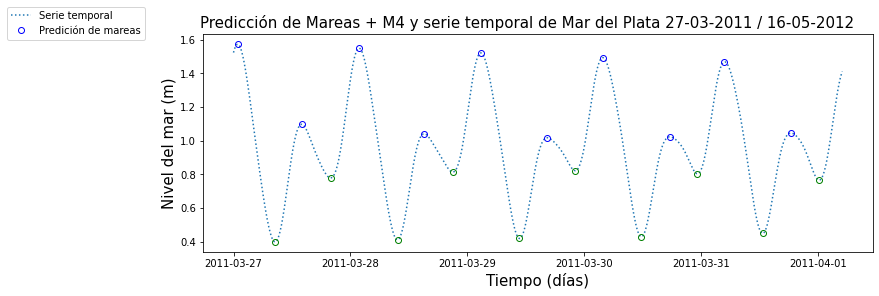

In [ ]:
fig,axs=plt.subplots(1,1,figsize=(12,4))
#axs.plot(seriegonz.FECHA,seriegonz.OBS)
axs.plot(pred7.fechas.iloc[0:1500],pred7.pred.iloc[0:1500],':')
axs.plot(altas['fechas'].iloc[0:10],altas['pred'].iloc[0:10],'bo',fillstyle='none')
axs.plot(bajas['fechas'].iloc[0:10],bajas['pred'].iloc[0:10],'go',fillstyle='none')
#ax.plot(altas['fechas'].iloc[0:7],altas['fechas'].iloc[0:7],'bo',fillstyle='none')
#ax.plot(bajas['fechas'].iloc[0:7],bajas['OBS'].iloc[0:7],'go',fillstyle='none')
fig.suptitle('Predicción de Mareas + M4 y serie temporal de Mar del Plata 27-03-2011 / 16-05-2012', x=.5,y=0.95,fontsize=15)
plt.legend(("Serie temporal", "Predición de mareas"),bbox_to_anchor=[-.3, 1.15], loc='upper left')
plt.ylabel('Nivel del mar (m)', fontsize=15)
plt.xlabel('Tiempo (días)',fontsize=15)